In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

### Question 1

In [2]:
X = np.array([1, 2, 3, 4, 5]).reshape(-1, 1)
y = np.array([1, 3, 3, 2, 5])

In [3]:
Xb = np.c_[np.ones_like(y), X]

alpha = .01
iterations = 10

theta = np.zeros_like(Xb[0])
errors_list = []

for i in range(iterations):
    for xi, yi in zip(Xb, y):
        prediction = xi @ theta
        error = prediction - yi
        updates = xi * error
        theta = theta - alpha * updates

        if i == 0:
            print("error", error.round(2), "theta", theta.round(2))
    
    predictions = Xb @ theta
    errors = predictions - y
    rmse = np.sqrt(np.mean(errors ** 2))
    errors_list.append(rmse)

error -1 theta [0.01 0.01]
error -2.97 theta [0.04 0.07]
error -2.75 theta [0.07 0.15]
error -1.32 theta [0.08 0.2 ]
error -3.89 theta [0.12 0.4 ]


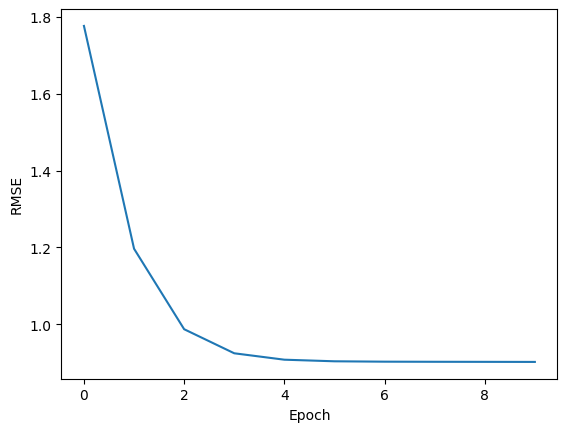

In [4]:
plt.plot(errors_list, label="Errors")
plt.ylabel("RMSE")
plt.xlabel("Epoch")
plt.show()

### Question 2

In [5]:
@np.vectorize
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

In [6]:
path = "data/data06_1.csv"
df = pd.read_csv(path)

X, y = df.iloc[:, :-1], df.iloc[:, -1]

In [7]:
Xb = np.c_[np.ones_like(y), X]

alpha = 0.5
iterations = 50

theta = np.zeros_like(Xb[0])
errors_list = []

for i in range(iterations):
    for xi, yi in zip(Xb, y):
        p = sigmoid(xi @ theta)
        error = p - yi
        gradient = xi * error
        theta = theta - alpha * gradient

        if i == 1:
            print('p', p, 'yi', yi, 'error', error, 'theta', theta)
        
    p = sigmoid(Xb @ theta)
    log_likelihood = np.sum(y * np.log(p) + (1 - y) * np.log(1 - p))
    errors_list.append(-log_likelihood)

p 0.8441351322923618 yi 0 error 0.8441351322923618 theta [-0.40792789  1.25311595]
p 0.8907382282672067 yi 0 error 0.8907382282672067 theta [-0.85329701  0.36237772]
p 0.5581941138106251 yi 0 error 0.5581941138106251 theta [-1.13239406 -0.47491345]
p 0.045998877441935454 yi 0 error 0.045998877441935454 theta [-1.1553935 -0.5669112]
p 0.01816459135534732 yi 1 error -0.9818354086446527 theta [-0.6644758   1.88767732]
p 0.9999765727701057 yi 1 error -2.342722989434609e-05 theta [-0.66446408  1.8877476 ]
p 0.9999964542918706 yi 1 error -3.5457081294376636e-06 theta [-0.66446231  1.88776001]
p 0.9999994631882203 yi 1 error -5.36811779694446e-07 theta [-0.66446204  1.88776216]


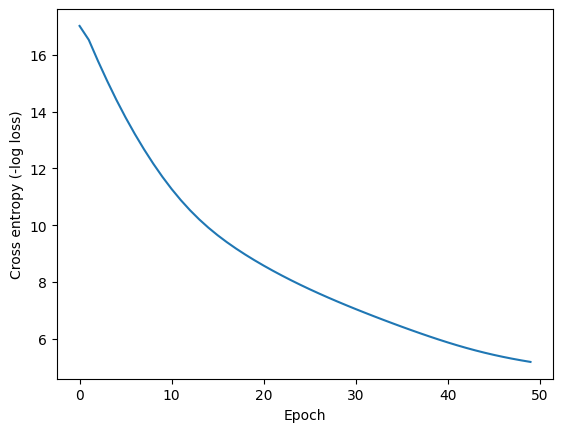

In [8]:
plt.plot(errors_list)
plt.ylabel("Cross entropy (-log loss)")
plt.xlabel("Epoch")
plt.show()

### Question 3

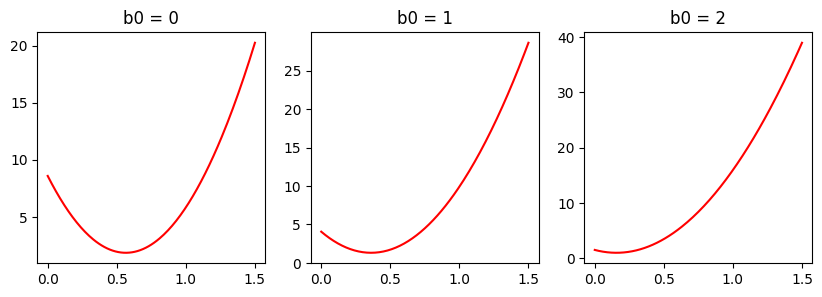

In [9]:
path = "data/data06_2.csv"
df = pd.read_csv(path)

X, y = df.iloc[:, :-1].to_numpy(), df.iloc[:, -1].to_numpy()

b0_space = (0, 1, 2)
b1_space = np.linspace(0, 1.5, 151)

fig, ax = plt.subplots(1, len(b0_space), figsize=(10, 3))

for i, b0 in enumerate(b0_space):
    mse = [np.mean((y - (X*b1 + b0)) ** 2) for b1 in b1_space]
    ax[i].plot(b1_space, mse, 'r')
    ax[i].set_title(f"b0 = {b0}")

### Question 4

Just copy Q2 and Q3 at this point.

### Question 5

In [13]:
def slope_mse_pairs(X, y, alpha=0.1, iterations=50):
    """Return list of (slope, mse) pairs encounted in gradient descent."""

    Xb = np.c_[np.ones_like(y), X]
    theta = np.zeros_like(Xb[0])

    for _ in range(iterations):
        predictions = Xb @ theta
        errors = predictions - y

        yield theta[1], np.mean(errors ** 2)

        gradient = X.T @ errors 
        theta = theta - (alpha / len(X)) * gradient

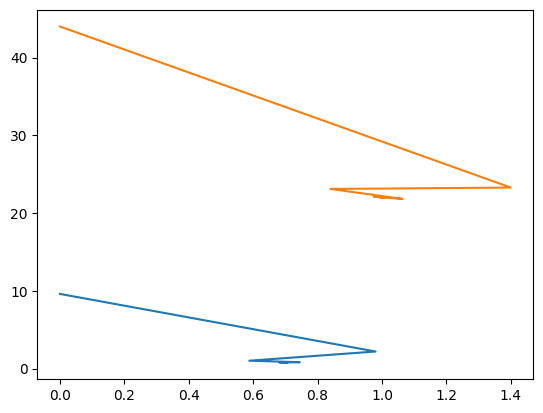

In [14]:
X = np.array([1, 2, 3, 4, 5])
y1 = np.array([1, 3, 3, 2, 5])
y2 = np.array([10, 8, 6, 4, 2])

for y in (y1, y2):
    slopes, mse = zip(*slope_mse_pairs(X, y))
    plt.plot(slopes, mse)